# Classification Project 

The main goal of this project is to create a classiication model and get the highest F1 

Imports:

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import json

Upload the provided datasets:

In [194]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")  # will be used only for final submission step

In [195]:
X_train.head(2)

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race
0,1847,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,1847,white
1,2905,Bachelors,2012,Bangalore,3,28.0,Male,No,4,2905,white


In [196]:
X_train.columns

Index(['Unnamed: 0', 'Education', 'JoiningYear', 'City', 'PaymentTier', 'Age',
       'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'id', 'Race'],
      dtype='object')

In [197]:
# Drop the 'Unnamed: 0' column
X_train.drop('Unnamed: 0', axis=1, inplace=True)

# Set the 'id' column as the index of the dataframe
X_train.set_index('id', inplace=True)

# View the new data frame
X_train.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
1847,Bachelors,2016,Bangalore,3,27.0,Male,Yes,4,white
2905,Bachelors,2012,Bangalore,3,28.0,Male,No,4,white


In [198]:
X_test.head(2)

,Unnamed: 0,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,id,Race
0,911,Bachelors,2014,Bangalore,3,25.0,Female,No,2,911,white
1,2235,Bachelors,2016,Bangalore,3,28.0,Female,No,5,2235,white


In [199]:
# Drop the 'Unnamed: 0' column
X_test.drop('Unnamed: 0', axis=1, inplace=True)

# Set the 'id' column as the index of the dataframe
X_test.set_index('id', inplace=True)

# View the new data frame
X_test.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
911,Bachelors,2014,Bangalore,3,25.0,Female,No,2,white
2235,Bachelors,2016,Bangalore,3,28.0,Female,No,5,white


In [200]:
y_train.head(2)

,Unnamed: 0,LeaveOrNot
0,1847,0
1,2905,0


In [201]:
# Set the 'id' column as the index of the dataframe
y_train.set_index('Unnamed: 0', inplace=True)

# View the new data frame
y_train.head(2)

,LeaveOrNot
Unnamed: 0,
1847,0
2905,0


In [202]:
# y_train.info()

In [203]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 1847 to 2575
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  3722 non-null   object 
 1   JoiningYear                3722 non-null   int64  
 2   City                       3722 non-null   object 
 3   PaymentTier                3722 non-null   int64  
 4   Age                        3720 non-null   float64
 5   Gender                     3720 non-null   object 
 6   EverBenched                3722 non-null   object 
 7   ExperienceInCurrentDomain  3722 non-null   int64  
 8   Race                       3722 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 290.8+ KB


In [204]:
X_train.shape

(3722, 9)

In [205]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 1847 to 2575
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LeaveOrNot  3722 non-null   int64
dtypes: int64(1)
memory usage: 58.2 KB


In [206]:
y_train.shape

(3722, 1)

Check for any missing values

In [207]:
X_train.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          2
Gender                       2
EverBenched                  0
ExperienceInCurrentDomain    0
Race                         0
dtype: int64

In [208]:
y_train.isnull().sum()

LeaveOrNot    0
dtype: int64

Check for imbalanced data

In [209]:
y_train['LeaveOrNot'].value_counts()

LeaveOrNot
0    2415
1    1307
Name: count, dtype: int64

In [210]:
X_test.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
Race                         0
dtype: int64

Examine the rows with the missing values:

In [211]:
X_train[X_train.isna().any(axis=1)]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
0,Bachelors,2017,Bangalore,3,NaN,NaN,No,0,white
1,Bachelors,2013,Pune,1,NaN,NaN,No,3,white


In [212]:
[(col, X_train[col].unique()) for col in X_train.columns]

# for col in X_train:
#     print(X_train[col].unique())

[('Education', array(['Bachelors', 'PHD', 'Masters'], dtype=object)),
 ('JoiningYear',
  array([2016, 2012, 2015, 2017, 2014, 2013, 2018], dtype=int64)),
 ('City', array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)),
 ('PaymentTier', array([3, 2, 1], dtype=int64)),
 ('Age',
  array([27., 28., 26., 29., 24., 40., 23., 42., 37., 35., 30., 33., 32.,
         39., 41., 31., 34., 25., 36., 38., 43., nan])),
 ('Gender', array(['Male', 'Female', nan], dtype=object)),
 ('EverBenched', array(['Yes', 'No'], dtype=object)),
 ('ExperienceInCurrentDomain', array([4, 2, 1, 0, 5, 3, 6, 7], dtype=int64)),
 ('Race', array(['white', 'black', 'yellow', 'red'], dtype=object))]

Age and gender statistics

In [213]:
X_train['Age'].mean()

30.928763440860216

In [214]:
# Consider imbalanced data
X_train['Gender'].value_counts()

Gender
Male      2218
Female    1502
Name: count, dtype: int64

Imputation

In [215]:
# Impute missing 'Age' values with the mean age
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)

In [216]:
# Impute missing 'Gender' values with the mode (most frequent category)
X_train['Gender'].fillna(X_train['Gender'].mode()[0], inplace=True)
X_train['Gender'].value_counts()

Gender
Male      2220
Female    1502
Name: count, dtype: int64

In [217]:
[(col, X_train[col].unique()) for col in X_train.columns]

[('Education', array(['Bachelors', 'PHD', 'Masters'], dtype=object)),
 ('JoiningYear',
  array([2016, 2012, 2015, 2017, 2014, 2013, 2018], dtype=int64)),
 ('City', array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)),
 ('PaymentTier', array([3, 2, 1], dtype=int64)),
 ('Age',
  array([27.        , 28.        , 26.        , 29.        , 24.        ,
         40.        , 23.        , 42.        , 37.        , 35.        ,
         30.        , 33.        , 32.        , 39.        , 41.        ,
         31.        , 34.        , 25.        , 36.        , 38.        ,
         43.        , 30.92876344])),
 ('Gender', array(['Male', 'Female'], dtype=object)),
 ('EverBenched', array(['Yes', 'No'], dtype=object)),
 ('ExperienceInCurrentDomain', array([4, 2, 1, 0, 5, 3, 6, 7], dtype=int64)),
 ('Race', array(['white', 'black', 'yellow', 'red'], dtype=object))]

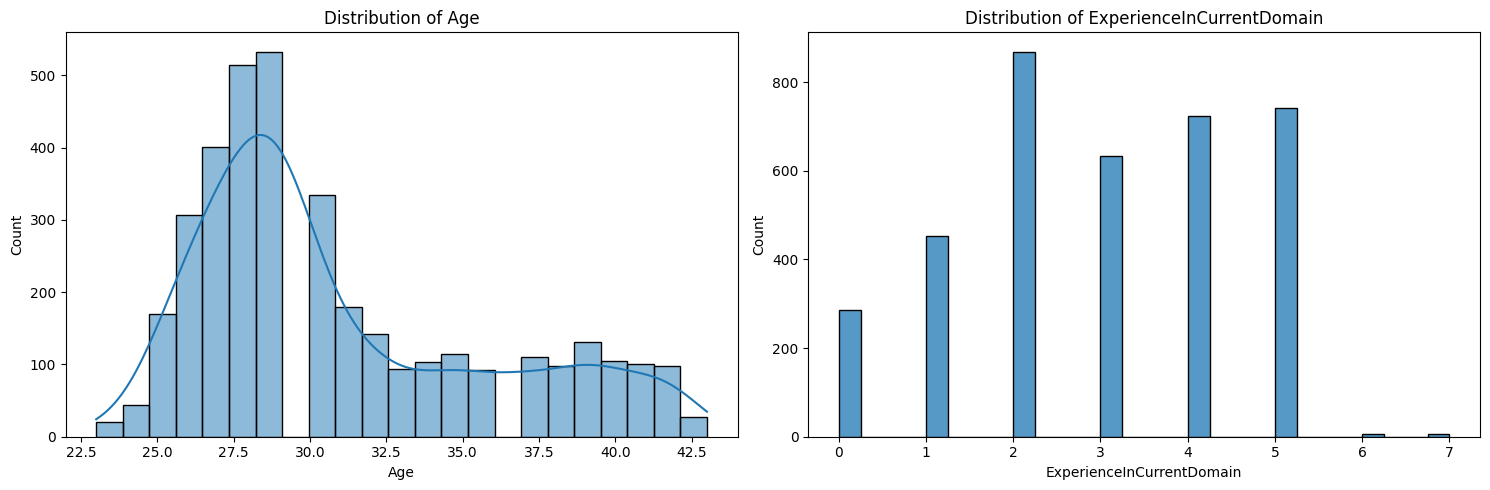

In [218]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the distribution of Age
sns.histplot(X_train['Age'], ax=axes[0], kde=True)
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot the distribution of ExperienceInCurrentDomain
sns.histplot(X_train['ExperienceInCurrentDomain'], ax=axes[1], kde=False)
axes[1].set_title('Distribution of ExperienceInCurrentDomain')
axes[1].set_xlabel('ExperienceInCurrentDomain')
axes[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()

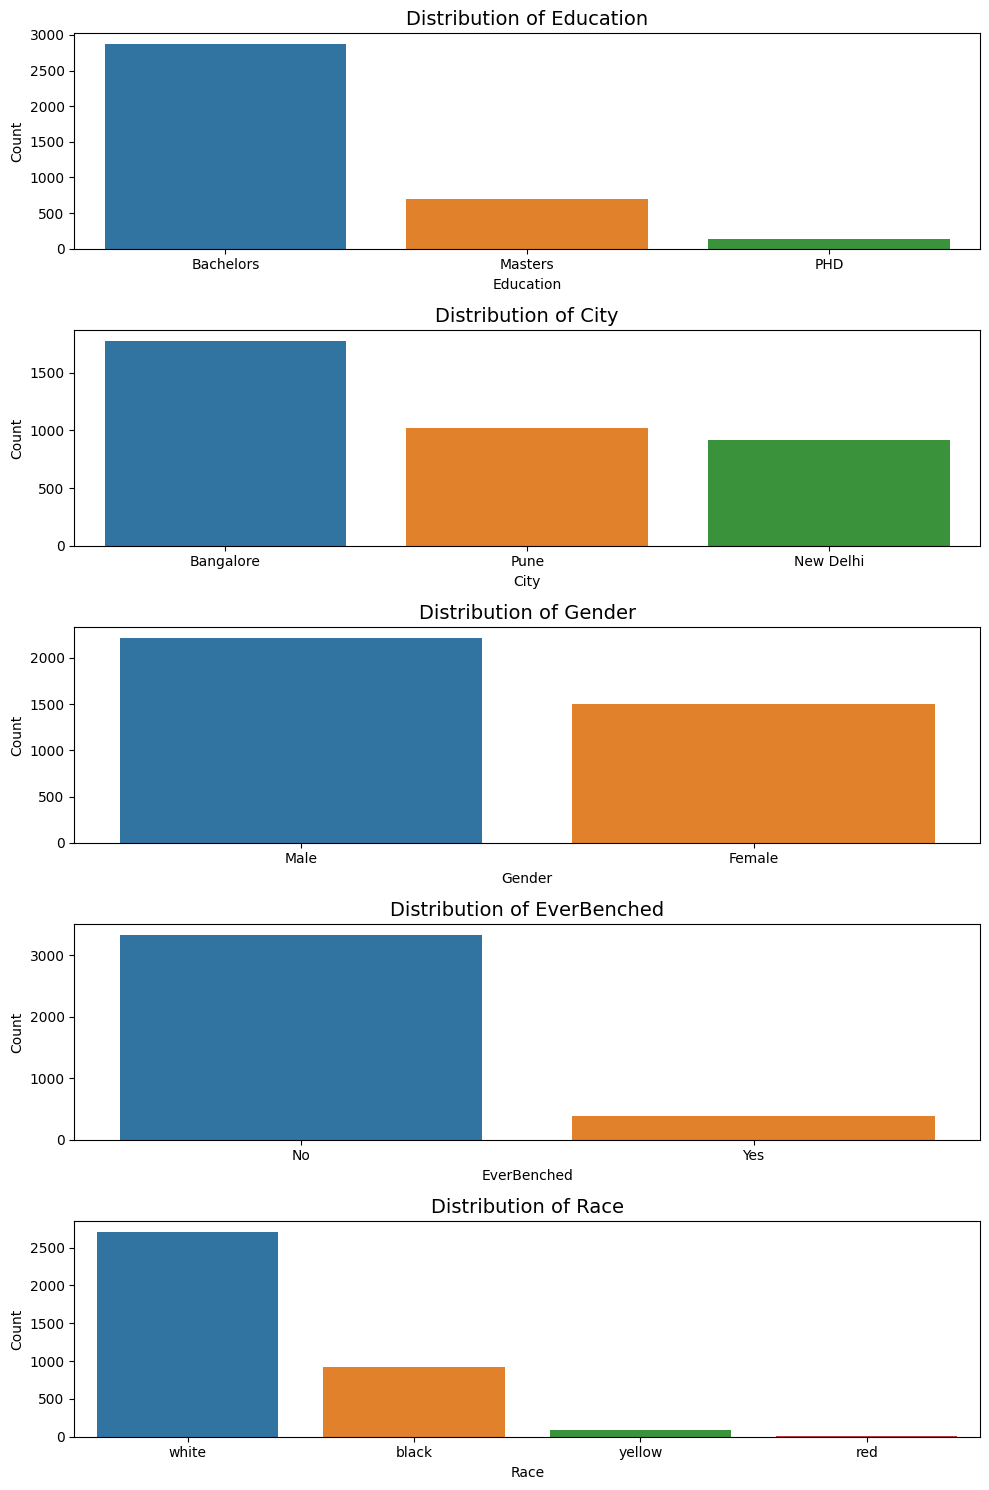

In [219]:
# List of categorical features to examine
categorical_features = ['Education', 'City', 'Gender', 'EverBenched', 'Race']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 15))

# Plot the distribution of each categorical feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=X_train, x=feature, ax=axes[i], order=X_train[feature].value_counts().index)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)  # Adjusted font size here
    axes[i].set_ylabel('Count')

# Adjust the layout to ensure there's spacing between the plots
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

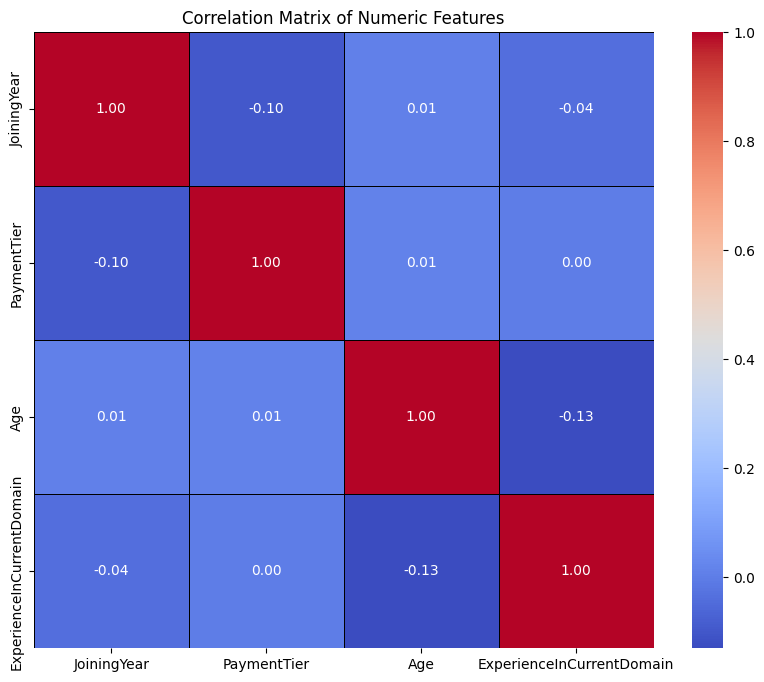

In [220]:
# Select numeric features for correlation matrix
numeric_features = X_train.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")
plt.title("Correlation Matrix of Numeric Features")

Prepare the data for classification algorithms

In [221]:
# Splitting the dataset 
# NTS: although we have an X_test, we don't have the real y_test...so we need tts
X_train_tts, X_test_tts, y_train_tts, y_test_tts = tts(X_train, y_train, test_size=0.5, random_state=123)

In [222]:
# Convert categorical columns to numeric
cat_cols = ['Education', 'City', 'Gender', 'EverBenched', 'Race']

def encode_categorical_columns(df, categorical_columns):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_features = encoder.fit_transform(df[categorical_columns])

    # Create a DataFrame with the encoded features
    encoded_df = pd.DataFrame(encoded_features, 
                              columns=encoder.get_feature_names_out(categorical_columns), 
                              index=df.index)

    # Drop original categorical columns and concatenate the encoded features
    df.drop(categorical_columns, axis=1, inplace=True)
    df_encoded = pd.concat([df, encoded_df], axis=1)

    return df_encoded

In [223]:
X_train_tts_encoded = encode_categorical_columns(X_train_tts, cat_cols)
X_test_tts_encoded = encode_categorical_columns(X_test_tts, cat_cols)    

In [224]:
# X_test_tts_encoded.head(2)

# Random Forest Model

In [225]:
rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_tts_encoded, y_train_tts.values.ravel()) # Ravel converts y_train to a 1 dimensional array and addresses warnings

RandomForestClassifier(random_state=123)

In [226]:
# evaluate your model's performance on unseen data.
# y_pred = rf.predict(X_test_tts_encoded)
# print("Accuracy:", accuracy_score(y_test_tts, y_pred))
# print(classification_report(y_test_tts, y_pred))

In [227]:
# Hyperparameter Tuning
rf_param_grid = {'n_estimators': [100, 200, 600], 'max_depth': [2, 6, 12, 15], 'criterion': ['gini', 'entropy']}
rf_gs = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring='f1')
rf_gs.fit(X_train_tts_encoded, y_train_tts.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 12, 15],
                         'n_estimators': [100, 200, 600]},
             scoring='f1')

In [228]:
# Output the best parameters
print("Best Parameters:", rf_gs.best_params_)

# Define the best estimator
best_rf = rf_gs.best_estimator_

best_rf.classes_

Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 600}


array([0, 1], dtype=int64)

In [229]:
#

In [230]:
# Construct confusion matrix of train set

cm_rf_train = confusion_matrix(y_true = y_train_tts, y_pred = best_rf.predict(X_train_tts_encoded))
pd.DataFrame(cm_rf_train, index = best_rf.classes_ ,columns = best_rf.classes_)

,0,1
0,1200,6
1,131,524


In [231]:
y_train_tts['LeaveOrNot'].value_counts()

LeaveOrNot
0    1206
1     655
Name: count, dtype: int64

In [232]:
# Use the best estimator to make predictions on the test set
y_pred_rf = best_rf.predict(X_test_tts_encoded)  

# Construct the confusion matrix of test set
cm_rf_test = confusion_matrix(y_true = y_test_tts, y_pred = best_rf.predict(X_test_tts_encoded))
pd.DataFrame(cm_rf_test, index = best_rf.classes_ ,columns = best_rf.classes_)

,0,1
0,1127,82
1,230,422


In [233]:
y_test_tts['LeaveOrNot'].value_counts()

LeaveOrNot
0    1209
1     652
Name: count, dtype: int64

In [234]:
# Generate and print the classification report
print(classification_report(y_test_tts, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1209
           1       0.84      0.65      0.73       652

    accuracy                           0.83      1861
   macro avg       0.83      0.79      0.80      1861
weighted avg       0.83      0.83      0.83      1861



In [235]:
# Get prediction probabilities for the positive class
y_pred_proba_rf = best_rf.predict_proba(X_test_tts_encoded)[:, 1]

In [236]:
# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test_tts, y_pred_proba_rf)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8478512384113018


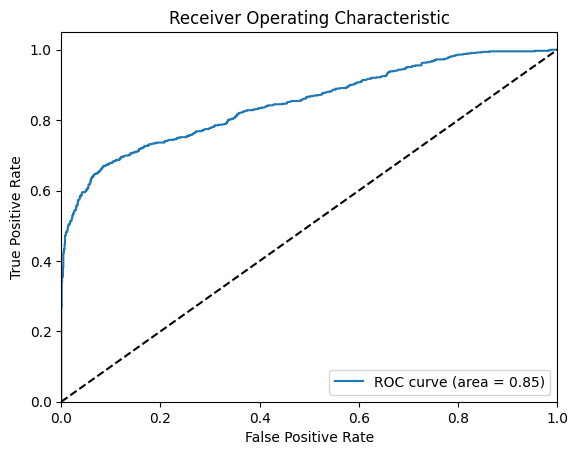

In [237]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test_tts, y_pred_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Logistic Regression Model

In [238]:
# Scaling the numerical data:

# Identifying numerical columns
numerical_cols = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']

# Initialize the scaler
scaler = StandardScaler()

# Create a copy of the original DataFrame for the scaled version
X_train_tts_encoded_scaled = X_train_tts_encoded.copy()

# Apply the scaler to the numerical columns of the training set (fit must be only on the training)
X_train_tts_encoded_scaled[numerical_cols] = scaler.fit_transform(X_train_tts_encoded[numerical_cols])

# Transform the test set
# Similarly, create a copy of the test set and apply the scaler
X_test_tts_encoded_scaled = X_test_tts_encoded.copy()
X_test_tts_encoded_scaled[numerical_cols] = scaler.transform(X_test_tts_encoded[numerical_cols])

# NTS: If your data features are on different scales, this can cause convergence issues. 
# Scaling your data to have a mean of 0 and a standard deviation of 1 can help. 
# fit_transform is used on the training set, and only transform is used on the test set. This ensures that the scaling is consistent between the two sets and is based only on the distribution of the training set

In [239]:
# Initialize logistic regression model
lg = LogisticRegression(random_state=123)

# Fit the model
lg.fit(X_train_tts_encoded_scaled, y_train_tts.values.ravel())

LogisticRegression(random_state=123)

In [240]:
# Grid search
lg_param_grid = {'penalty': ['l1', 'l2'], 
                 'C': [0.001, 0.01, 1], 
                 'tol': [0.0001, 0.001], 
                 'solver': ['liblinear'],
                'max_iter': [500]}
lg_gs = GridSearchCV(estimator=lg, param_grid=lg_param_grid, cv=5, scoring='f1')
lg_gs.fit(X_train_tts_encoded_scaled, y_train_tts.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.001, 0.01, 1], 'max_iter': [500],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear'],
                         'tol': [0.0001, 0.001]},
             scoring='f1')

In [241]:
# Output the best parameters
print("Best Parameters:", lg_gs.best_params_)

# Define the best estimator
best_lg = lg_gs.best_estimator_

best_lg.classes_

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}


array([0, 1], dtype=int64)

In [242]:
# Construct confusion matrix of train set

cm_lg_train = confusion_matrix(y_true = y_train_tts, y_pred = best_lg.predict(X_train_tts_encoded_scaled))
pd.DataFrame(cm_lg_train, index = best_lg.classes_ ,columns = best_lg.classes_)

,0,1
0,1091,115
1,351,304


In [243]:
# Use the best estimator to make predictions on the test set
y_pred_lg = best_lg.predict(X_test_tts_encoded_scaled)  

# Construct the confusion matrix of test set
cm_lg_test = confusion_matrix(y_true = y_test_tts, y_pred = best_lg.predict(X_test_tts_encoded_scaled))
pd.DataFrame(cm_lg_test, index = best_lg.classes_ ,columns = best_lg.classes_)

,0,1
0,1055,154
1,373,279


In [244]:
print(classification_report(y_test_tts, y_pred_lg))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1209
           1       0.64      0.43      0.51       652

    accuracy                           0.72      1861
   macro avg       0.69      0.65      0.66      1861
weighted avg       0.71      0.72      0.70      1861



In [245]:
# Get prediction probabilities for the positive class
y_pred_proba_lg = best_lg.predict_proba(X_test_tts_encoded_scaled)[:, 1]

In [246]:
# Compute ROC AUC Score
roc_auc = roc_auc_score(y_test_tts, y_pred_proba_lg)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7131115305961931


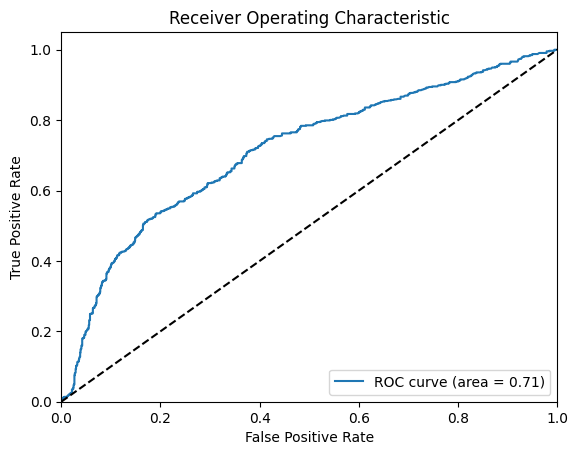

In [247]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test_tts, y_pred_proba_lg)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Submission

In [248]:
# external test dataset should undergo the same preprocessing steps as training dataset
X_test.head(2)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Race
id,,,,,,,,,
911,Bachelors,2014,Bangalore,3,25.0,Female,No,2,white
2235,Bachelors,2016,Bangalore,3,28.0,Female,No,5,white


In [249]:
X_test.shape

(931, 9)

In [250]:
X_test.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
Race                         0
dtype: int64

In [251]:
X_test_encoded = encode_categorical_columns(X_test, cat_cols)
X_test_encoded.head(2)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes,Race_black,Race_red,Race_white,Race_yellow
id,,,,,,,,,,,,,,,,,,
911,2014,3,25.0,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2235,2016,3,28.0,5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [252]:
final_y_pred_rf = best_rf.predict(X_test_encoded)  
final_y_pred_rf.shape

(931,)

Create a dictionary with the predicted values {id: prediction}

In [262]:
prediction_dict = {id_: pred for id_, pred in zip(X_test_encoded.index, final_y_pred_rf)}

# Convert NumPy int64 types to native Python int types in the dictionary (JASON requirement)
prediction_dict_converted = {int(id_): int(pred) for id_, pred in prediction_dict.items()}

 Convert dictionary to JSON File

In [263]:
# with open('Daria_non_final_predictions.json', 'w') as f:
#     json.dump(prediction_dict_converted, f)

In [ ]:
# nts: check key:value. dies the key have to str or int